# Statistics Fundamentals
Here are a couple of takeaways you can expect by the end of this tutorial

- How population and sampels work
- Various sampling methods you can use

Here is the workflow we'll begin working with in this lesson
![statistics-pic-1](https://raw.githubusercontent.com/tongNJ/Dataquest-Online-Courses-2022/main/Pictures/statistics-pic-1.PNG)

In statistics, we call the set of all individuals relevant to a particular statistical question a **population**. 
We call a smaller group selected from a population a **sample**. When we select a smaller group from a population we're **sampling**.

#### Examples
Now it's our turn to play the data analyst. We collected data about the salaries of all the individuals in the company working in IT roles. Based on this data, we want to answer a series of questions. Depending on the question, our data is either a sample or a population.

Identify which is the case, and assign to the corresponding variable the string 'population' or 'sample'. Here are the questions we need to answer:

- What's the average salary of the individuals in our company working in IT roles? **population**
- What's the proportion of individuals in the IT department having salaries under 60000? **population**
- What's the minimum salary in the entire company? **sample**
- What's the minimum salary in the IT department of our company? **population**
- What's the proportion of salaries under 20000 in the entire company? **sample**

For every statistical question we want to answer, we should try to use the population. In practice, that's not always possible because the populations of interest usually vary from large to extremely large. Also, getting data is generally not an easy task, so small populations often pose problems too.

We can solve these problems by sampling from the population that interests us. Although it's not as good as working with the entire population, working with a sample is the next best thing.

or this reason, there's almost always some difference between the metrics of a population and the metrics of a sample. We can see this difference as an error, and because it's the result of sampling, we call it **sampling error**.

In statistical terms, we want our samples to be **representative** of their corresponding populations. If a sample is representative, then the sampling error is low. The more representative a sample is, the smaller the sampling error. The less representative a sample is, the greater the sampling error.


### A real data set we use for sampling lesson
At this point in the lesson, we'll move from the tech company example to working with a real-world dataset. Our first challenge will be to measure sampling error using this dataset.

The dataset is about basketball players in the **WNBA** (Women's National Basketball Association), and contains general information about players, along with their metrics for the 2016-2017 season. **Thomas De Jonghe** assembled this dataset, and you can download it from **Kaggle** (where you can also find useful documentation for the dataset).

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
dataset_loc = 'D:/Dataquest/Dataquest 2022 Learning/Datasets/'
wnba = pd.read_csv(dataset_loc + 'wnba.csv')

In [3]:
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


In [10]:
# Use the Games Played column to find the maximum number of games played by a player in the 2016-2017 season.
parameter=wnba['Games Played'].max()
print(f'the maximum games played for population is ' + str(parameter))

# Using the DataFrame.sample() method, randomly sample 30 players from the population, and assign the result to a variable named sample.
sample = wnba['Games Played'].sample(n=30)
statistic = sample.max()
print(f'the maximum games played in a sample (n=30) is ' + str(statistic))

sampling_error = parameter - statistic
print(f'sampling error is ' + str(sampling_error))

the maximum games played for population is 32
the maximum games played in a sample (n=30) is 31
sampling error is 1


### Test 1
Let's visualize the discrepancy between a parameter and its corresponding statistics in the case of simple random sampling.
1. Using simple random sampling, take 100 samples of 10 values each from our WNBA data set, and for each sample, measure the average points scored by a player during the 2016-2017 season. For each of the 100 iterations of a for loop, do the following:

(P.S. When we use the random_state parameter, like we did in the previous exercise with Series.sample(30, random_state = 1), we make the generation of random numbers predictable. This is because Series.sample() uses a pseudorandom number generator. A pseudorandom number generator uses an initial value to generate a sequence of numbers that has properties similar to those of a sequence that is truly random. With random_state, we specify that initial value used by the pseudorandom number generator.)

2. Display the discrepancy between the parameter of interest (the mean of the PTS column) and the statistics obtained in the previous step.

In [27]:
sample_list = []
for i in range(0,100):
    n = wnba['PTS'].sample(n=10,random_state=i+1)
    n_avg = n.mean()
    sample_list.append(n_avg)
print(len(sample_list))
sample_list[0:5]

100


[185.4, 140.4, 293.7, 172.7, 124.9]

population mean is 201.7902097902098
maximum sample is 301.4
minimum sample is 115.0
large sampling errir indicates that the sample we get isnt representative of the population


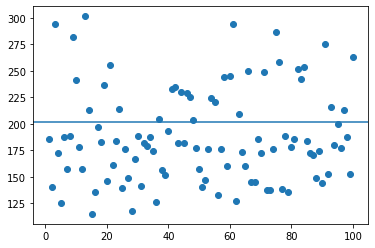

In [44]:
population_mean = wnba['PTS'].mean()
print(f'population mean is {population_mean}')
x = np.arange(1,101,1)
y = sample_list
plt.scatter(x,y)
plt.axhline(y=population_mean)
plt.show

print(f'maximum sample is {max(sample_list)}')
print(f'minimum sample is {min(sample_list)}')
print(f'large sampling errir indicates that the sample we get isnt representative of the population')

On the scatter plot from the previous screen, we can see that the sample means vary a lot around the population mean. With a minimum sample mean of 115 points, a maximum of 301.4, and a population mean of roughly 201.8, we can tell that the sampling error is quite large for some of the cases.

In [32]:
x

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])